In [23]:
# Hoàng Vân Trường 20205134

import random
import numpy as np
import matplotlib.pyplot as plt


800 800


Text(0, 0.5, 'c1(t)')

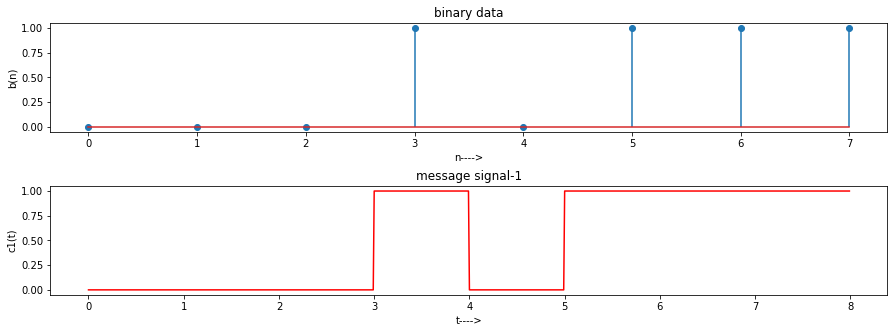

In [24]:

def random_bits_array(n):   # hàm tạo mảng bit ngẫu nhiên
    return [random.randint(0, 1) for _ in range(n)]
def message_signal(m,T):    # hàm tạo tín hiệu xung vuông và ngược tín hiệu xung
    # T thời gian truyền 1 bit
    t = np.arange(0, T, T/100)
    message = []
    not_message = []
    for i in range(len(m)):
        
        if m[i] == 1:
            m_s = np.ones(len(t))
            invm_s = np.zeros(len(t))
        else:
            m_s = np.zeros(len(t))
            invm_s = np.ones(len(t))
        message.extend(m_s)
        not_message.extend(invm_s)
    return message , not_message
           
N = 8       # Số lượng bit
Tb = 1       # Thời gian truyền 1 bit
T = 1*N    # Thời gian lấy mẫu
t = np.arange(0, T, T/800)

m = random_bits_array(N)

fig, ax = plt.subplots(2, 1, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)
ax[0].stem(m)
ax[0].set_title('binary data')
ax[0].set_xlabel('n---->')
ax[0].set_ylabel('b(n)')
message , not_message = message_signal(m,T)
print(len(message), len(not_message))
ax[1].plot(t,message, 'r')
ax[1].set_title('message signal-1')
ax[1].set_xlabel('t---->')
ax[1].set_ylabel('c1(t)')


Text(0, 0.5, 'c2(t)')

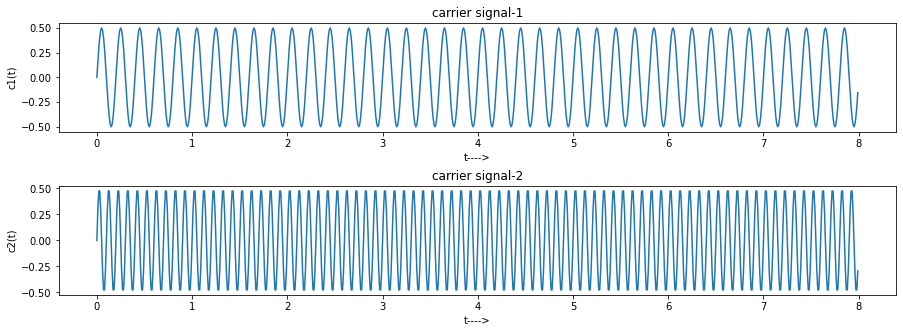

In [25]:
fc1 = 5
fc2 = 10
c1 = np.sqrt(2/T) * np.sin(2 * np.pi * fc1 * t)
c2 = np.sqrt(2/T) * np.sin(2 * np.pi * fc2 * t)
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)
ax[0].plot(t, c1)
ax[0].set_title('carrier signal-1')
ax[0].set_xlabel('t---->')
ax[0].set_ylabel('c1(t)')

ax[1].plot(t, c2)
ax[1].set_title('carrier signal-2')
ax[1].set_xlabel('t---->')
ax[1].set_ylabel('c2(t)')


Text(0, 0.5, 'FSK')

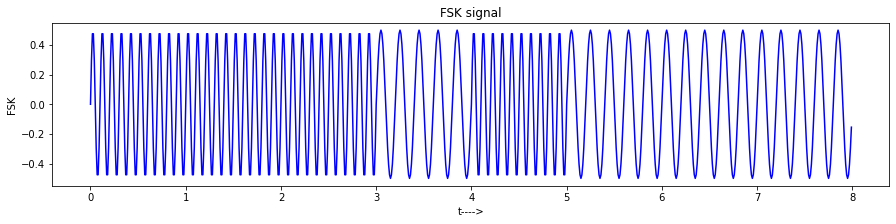

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
def modulation(message_signal,not_message_signal):  # 
    return message_signal*c1+ not_message*c2
fsk = modulation(message,not_message)
ax.figsize=(15, 5)
ax.plot(t,fsk, 'b')
ax.set_title('FSK signal')
ax.set_xlabel('t---->')
ax.set_ylabel('FSK')

-12.499999999999995
-12.5
-12.499999999999988
12.499999999999998
-12.499999999999904
12.499999999999991
12.499999999999995
12.500000000000005


Text(0, 0.5, 'b(n)')

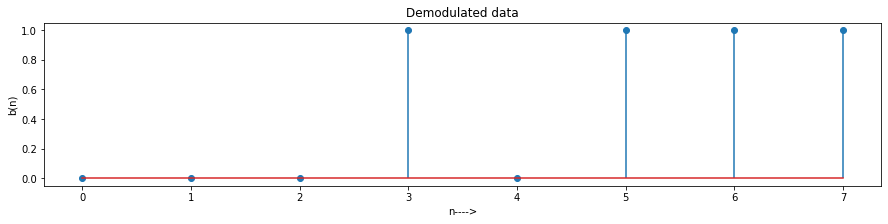

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
def demodulation(fsk,N,T):
    start = 0
    end = 100
    demod = np.zeros(N)
    for i in range(N):
        x1 = np.sum(c1[start:end] * fsk[start:end])
        x2 = np.sum(c2[start:end] * fsk[start:end])
        x = x1 - x2
        print(x)
        if x > 0:
            demod[i] = 1
        else:
            demod[i] = 0
        start += 100
        end += 100
    return demod
demod = demodulation(fsk,N,T)
ax.stem(demod)
ax.set_title("Demodulated data")
ax.set_xlabel("n---->")
ax.set_ylabel("b(n)")
    

Text(0, 0.5, 'FSK')

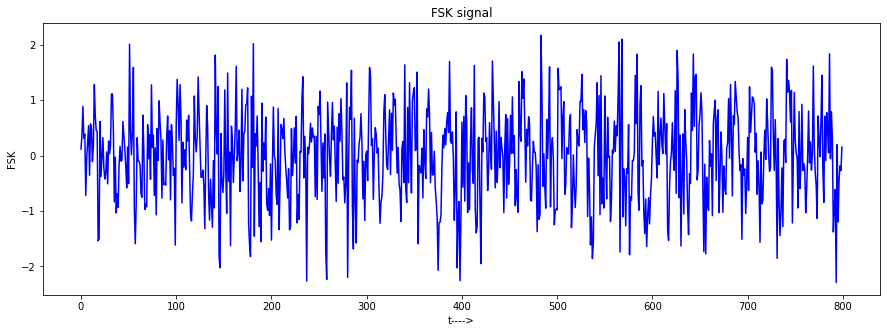

In [28]:
noise = np.random.normal ( 0 , np.sqrt(1/2) , len (t))

gauss = fsk + noise
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(gauss, 'b')
ax.set_title('FSK signal')
ax.set_xlabel('t---->')
ax.set_ylabel('FSK')


-12.5096993707589
-9.87612064144521
-12.229143041029163
14.206810431606915
-4.141230899174963
10.846862937192011
9.715066438302324
18.42726134353469


Text(0, 0.5, 'FSK')

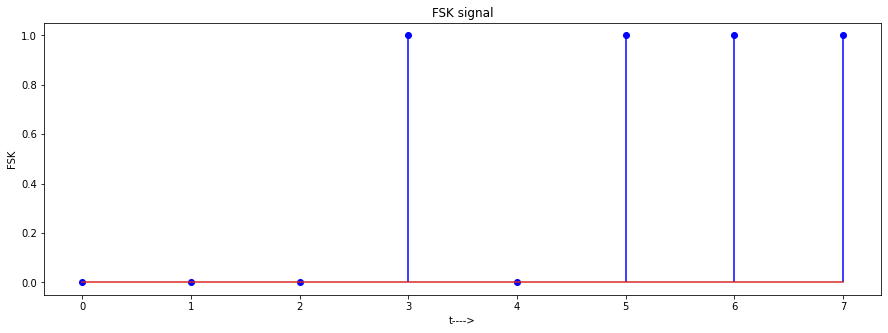

In [29]:
x1 = demodulation(gauss,N,T)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.stem(x1, 'b')
ax.set_title('FSK signal')
ax.set_xlabel('t---->')
ax.set_ylabel('FSK')